In [12]:
import cv2 as cv
import numpy as np

# Load Images

pastor = cv.imread(r"C:\Users\50510\Desktop\Kutty_Pastor.jpg")
ashok = cv.imread(r"C:\Users\50510\Desktop\Ashok.png")

def resize_Images(img):
    res = cv.resize(img, (250, 250),  interpolation=cv.INTER_CUBIC)
    gray = cv.cvtColor(res, cv.COLOR_BGR2GRAY)  # Convert to gray color
    return gray

pastor1 = resize_Images(pastor)
ashok1 = resize_Images(ashok)
ashok1.shape, pastor1.shape

((250, 250), (250, 250))

In [13]:
cv.imshow('Ashok', ashok1)
cv.imshow('pastor1', pastor1)
cv.waitKey(0)
cv.destroyAllWindows()

AxesImage(shape=(250, 250))
AxesImage(shape=(250, 250))
The similarity between Ashok and Kutty Pastor 43.34%


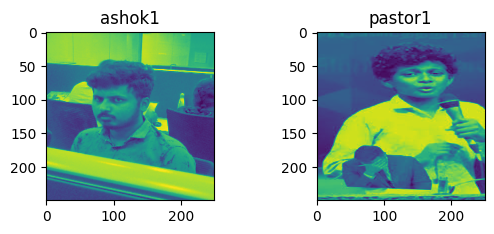

In [21]:
import matplotlib.pyplot as plt
sim = 43.34
import numpy as np
plt.subplot(2,2,1)
plt.title('ashok1')
print(plt.imshow(ashok1))
plt.subplot(2,2,2)
plt.title('pastor1')
print(plt.imshow(pastor1))

print(f"The similarity between Ashok and Kutty Pastor {sim}%")

In [22]:
from skimage import metrics

# Compute the Structural Similarity Index (SSI)
ssi = metrics.structural_similarity(pastor1, ashok1)

# Compute the Mean Squared Error (MSE)
mse = metrics.mean_squared_error(pastor1, ashok1)

print(f"Structural Similarity Index: {ssi}")
print(f"Mean Squared The Error in the similarity Calculation: {mse}")

Structural Similarity Index: 0.2063907238663735
Mean Squared The Error in the similarity Calculation: 11048.95416


### The Cosine Similarity Method  VGG16 

In [3]:
from PIL import Image
import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from keras.applications.vgg16 import VGG16
from sklearn.metrics.pairwise import cosine_similarity

The weights='imagenet' parameter specifies that the model should be initialized with pre-trained weights from the ImageNet dataset, a large dataset of labeled images used for training computer vision models.

The include_top=False parameter indicates that the top dense layers of the model, which are responsible for classification, should not be included. This is done when we want to use the pre-trained model as a feature extractor, and then add our own custom classification layers on top of it.

The parameter pooling='max' operation is useful for reducing the size of the feature maps while retaining the most important information.

The input_shape=(224, 224, 3) parameter specifies the expected shape of the input images, which in this case are 224x224 color images.

In [4]:
vgg16 = VGG16(weights='imagenet', include_top=False,
              pooling='max', input_shape=(224,224,3))
# print the summary of the model's architecture.
vgg16.summary()

58889256/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [5]:
## Freezing the VGG16 Model Layers for Transfer Learning

for model_layer in vgg16.layers:
    model_layer.trainable = False

In [6]:
def load_image(image_path):
    """
        -----------------------------------------------------
        Process the image provided. 
        - Resize the image 
        -----------------------------------------------------
        return resized image
    """

    input_image = Image.open(image_path)
    resized_image = input_image.resize((224, 224))

    return resized_image

def get_image_embeddings(object_image : image):
    
    """
      -----------------------------------------------------
      convert image into 3d array and add additional dimension for model input
      -----------------------------------------------------
      return embeddings of the given image
    """

    image_array = np.expand_dims(image.img_to_array(object_image), axis = 0)
    image_embedding = vgg16.predict(image_array)

    return image_embedding

This function takes an image object as input and converts the image to a 3D array with the img_to_array method from the Keras image module.

The resulting array is then expanded to have an additional dimension using the np.expand_dims() method, which is required for the VGG16 deep learning model input. The expanded array represents a single image with shape (1, height, width, channels), where height, width, and channels correspond to the dimensions of the image.

The function then calls the predict() method on the VGG16 model, which has been previously defined in the code. This method takes the expanded numpyarray as input and generates an embedding for the image using the pre-trained weights of the VGG16 model.

Finally, the function returns the image embedding as a numpyarray. This embedding can be used as a feature representation of the input image, which can be used for tasks such as image retrieval, similarity search, or classification

In [7]:
def get_similarity_score(first_image : str, second_image : str):
    """
        -----------------------------------------------------
        Takes image array and computes its embedding using VGG16 model.
        -----------------------------------------------------
        return embedding of the image
        
    """

    first_image = load_image(first_image)
    second_image = load_image(second_image)

    first_image_vector = get_image_embeddings(first_image)
    second_image_vector = get_image_embeddings(second_image)
    
    similarity_score = cosine_similarity(first_image_vector, second_image_vector).reshape(1,)

    return similarity_score

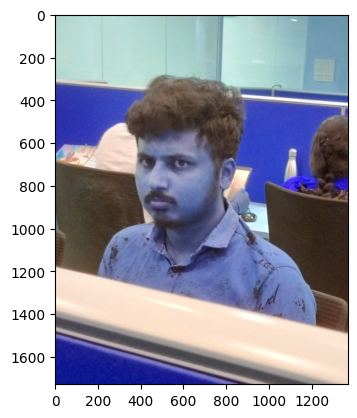

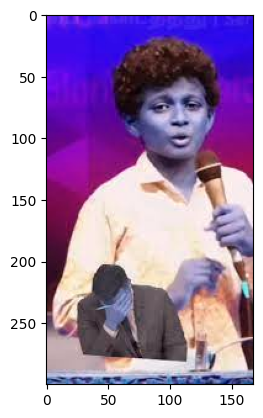

(None, None)

In [11]:
import cv2 as cv

def show_image(image_path):
  image = cv.imread(image_path)
  imgplot = plt.imshow(image)
  plt.show()


pastor = r"C:\Users\50510\Desktop\Kutty_Pastor.jpg"
ashok = r"C:\Users\50510\Desktop\Ashok.png"

# use the show_image function to plot the images
show_image(ashok), show_image(pastor)

In [12]:
similarity_score = get_similarity_score(pastor, ashok)
similarity_score

1/1 [==============================] - 0s 119ms/step


array([0.7301916], dtype=float32)

In [14]:
import cv2
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.metrics.pairwise import cosine_similarity


# Load Images
image1 = cv2.imread(r"C:\Users\50510\Desktop\Cat.jpg")
image2 = cv2.imread(r"F:\Open CV\gray_img.jpeg")

# Resize images to match the input size of the VGG16 model
image1 = cv2.resize(image1, (224, 224))
image2 = cv2.resize(image2, (224, 224))

# Preprocess the images
image1 = preprocess_input(image1)
image2 = preprocess_input(image2)

# Create a VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Obtain embeddings for the images
image1_embedding = model.predict(np.expand_dims(image1, axis=0)).flatten()
image2_embedding = model.predict(np.expand_dims(image2, axis=0)).flatten()

# Reshape the embeddings for cosine similarity calculation
image1_embedding = image1_embedding.reshape(1, -1)
image2_embedding = image2_embedding.reshape(1, -1)

# Compute the cosine similarity
similarity_score = cosine_similarity(image1_embedding, image2_embedding)[0][0]

print(f"Image similarity score: {similarity_score}")


1/1 [==============================] - 0s 109ms/step
Image similarity score: 0.914784848690033


### Clone Images

In [18]:
import cv2 as cv

pastor = r"C:\Users\50510\Desktop\Kutty_Pastor.jpg"
ashok = r"C:\Users\50510\Desktop\Ashok.png"

# Load the two images
img1 = cv.imread(r"C:\Users\50510\Desktop\Kutty_Pastor.jpg")
img2 = cv.imread(r"C:\Users\50510\Desktop\Ashok.png")

# Clone the images
clone_image1 = np.copy(img1)
clone_image2 = np.copy(img2)

# Create a final image by horizontally stacking the cloned images
final_image = np.hstack((clone_image1, clone_image2))

# Display the final image (optional)
cv2.imshow('Final Image', final_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 300 and the array at index 1 has size 1728